In [6]:

# a) Load libraries
# standard imports
import os

# Third Party Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelBinarizer


In [7]:
df = pd.read_csv('diabetes_dataset.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [9]:
df.shape

(10000, 21)

In [10]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [11]:
df.isna().sum()

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [12]:
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [14]:
df.describe()

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,2886.89568,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,0.00000,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,2499.75000,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,4999.50000,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,7499.25000,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,9999.00000,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


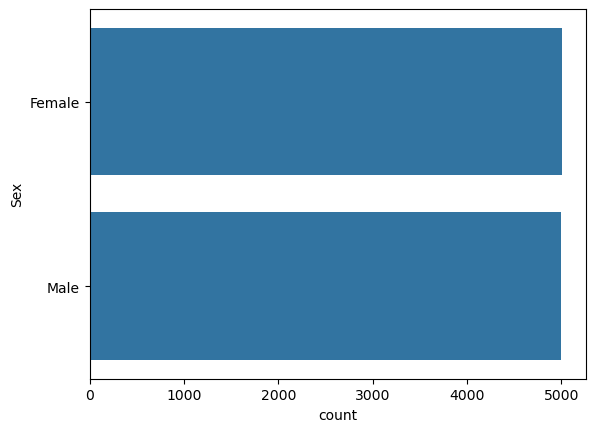

In [15]:
#EDA for non-numerical value
sns.countplot(df['Sex'])
plt.show()

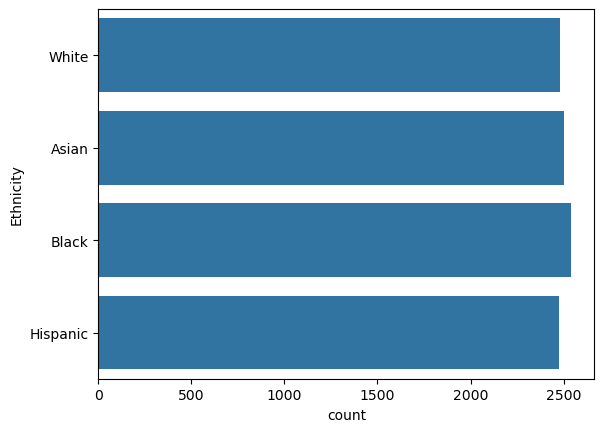

In [16]:
sns.countplot(df['Ethnicity'])
plt.show()

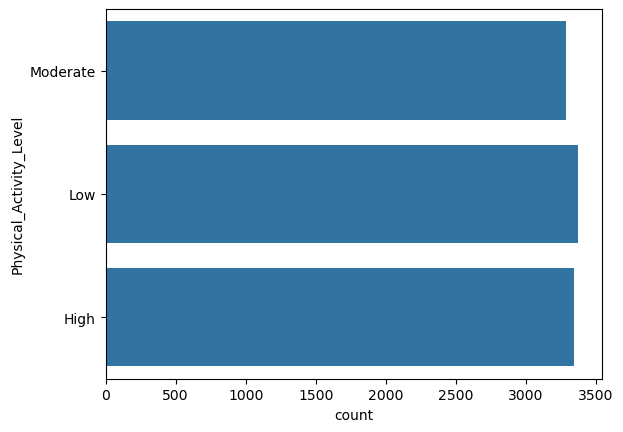

In [17]:
sns.countplot(df['Physical_Activity_Level'])
plt.show()

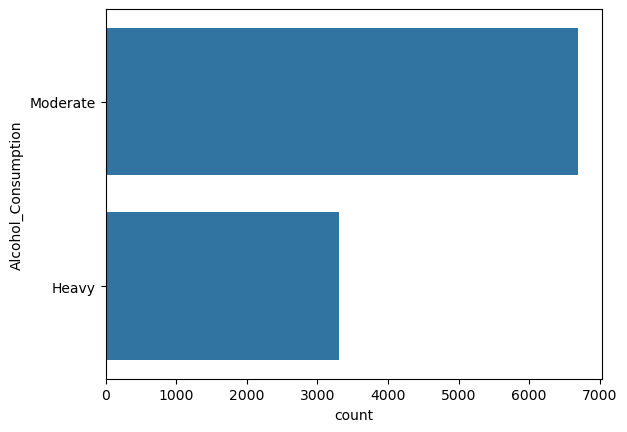

In [18]:
sns.countplot(df['Alcohol_Consumption'])
plt.show()

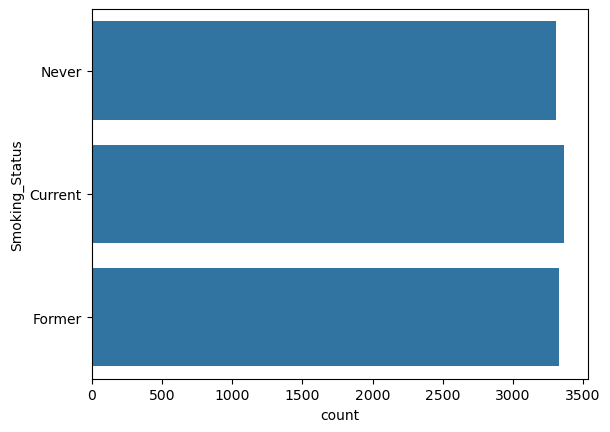

In [19]:
sns.countplot(df['Smoking_Status'])
plt.show()

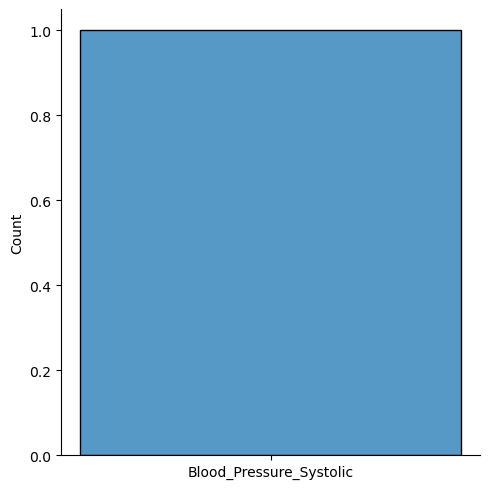

In [20]:
# Numerical attributes visualization
sns.displot('Blood_Pressure_Systolic')


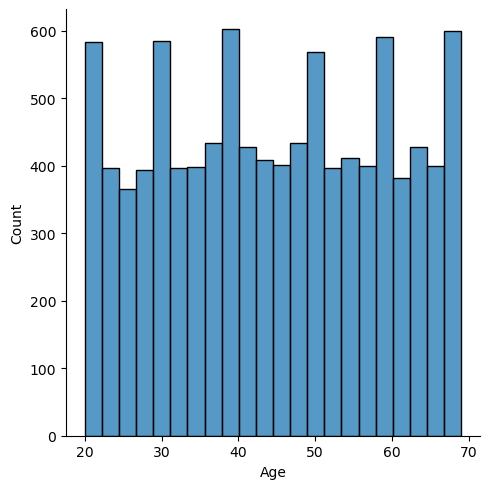

In [21]:
sns.displot(df['Age'])

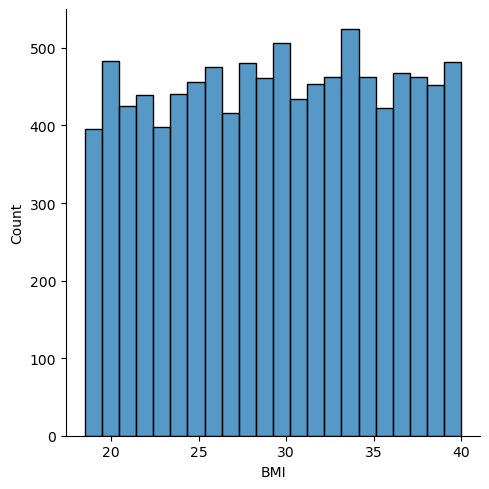

In [22]:
sns.displot(df['BMI'])

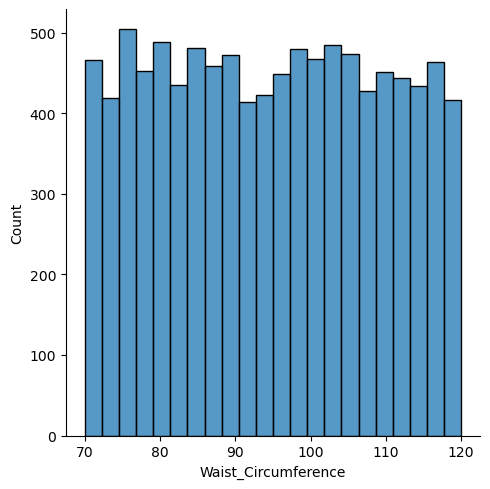

In [23]:
sns.displot(df['Waist_Circumference'])

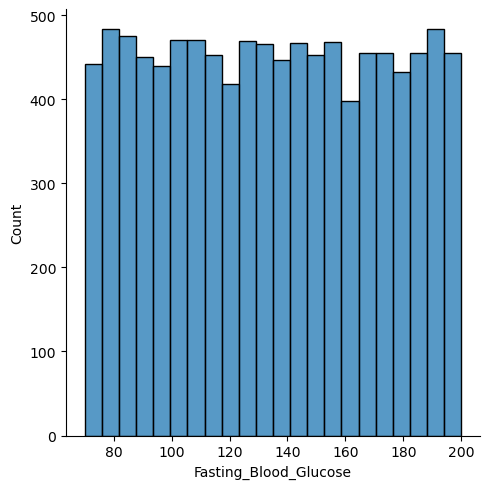

In [24]:
sns.displot(df['Fasting_Blood_Glucose'])

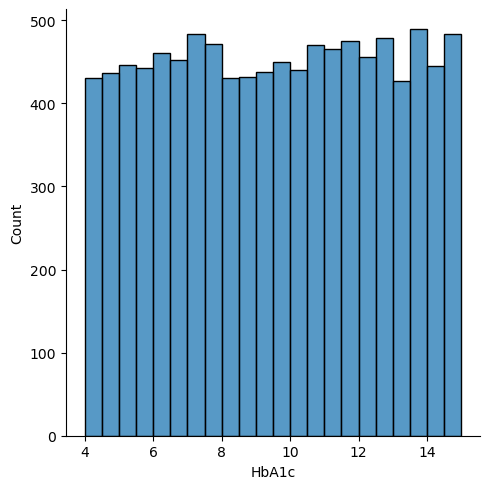

In [25]:
sns.displot(df['HbA1c'])

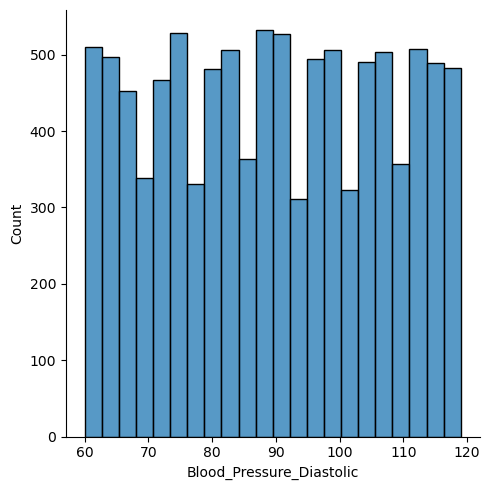

In [26]:
sns.displot(df['Blood_Pressure_Diastolic'])

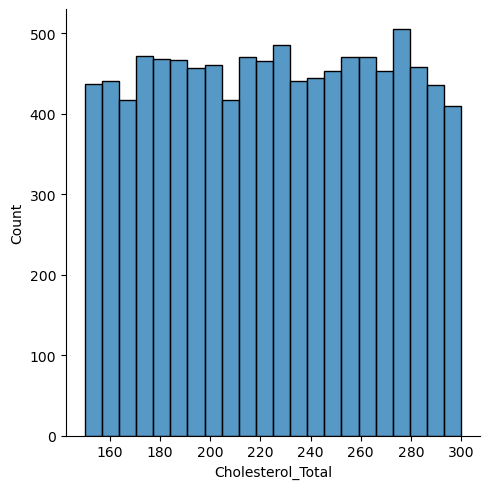

In [27]:
sns.displot(df['Cholesterol_Total'])

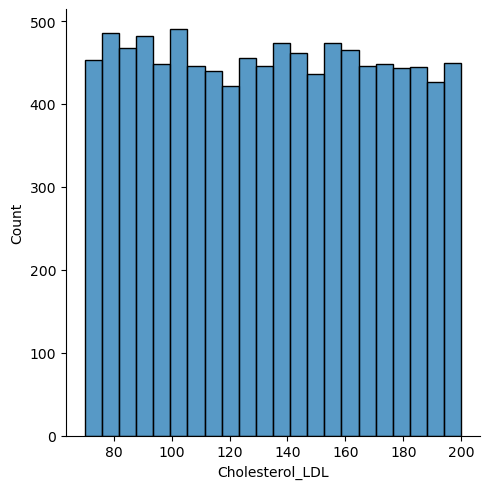

In [28]:
sns.displot(df['Cholesterol_LDL'])

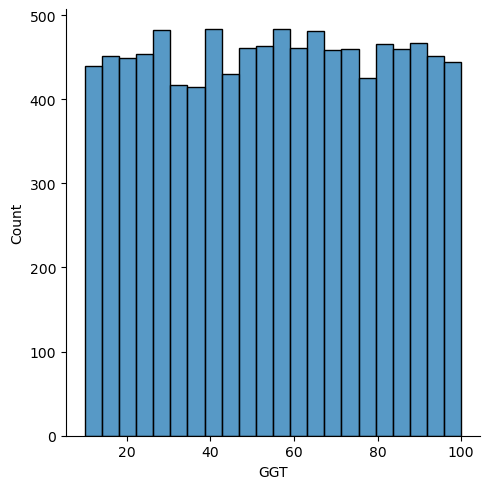

In [29]:
sns.displot(df['GGT'])

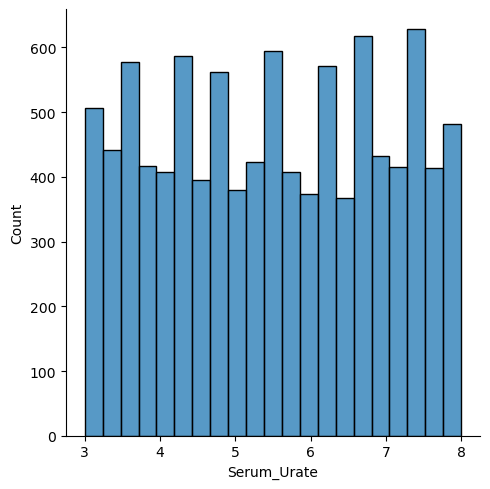

In [30]:
sns.displot(df['Serum_Urate'])

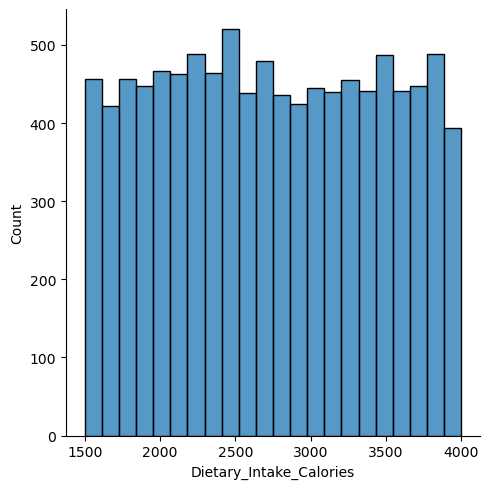

In [31]:
sns.displot(df['Dietary_Intake_Calories'])

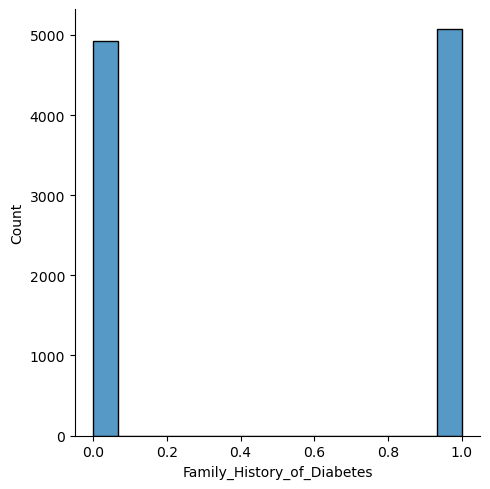

In [32]:
sns.displot(df['Family_History_of_Diabetes'])

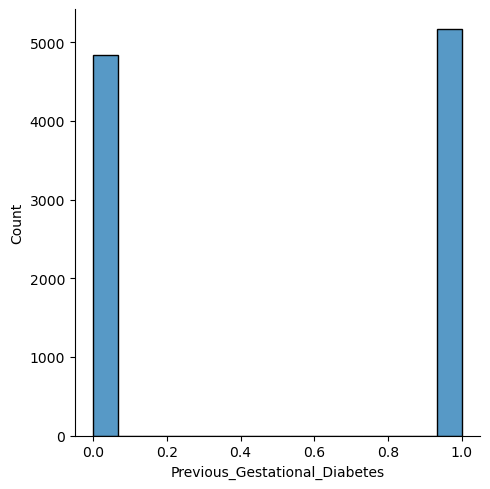

In [33]:
sns.displot(df['Previous_Gestational_Diabetes'])

In [34]:
# select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# calculate correlation matrix
corr_matrix = numerical_df.corr()

# display correlation matrix
corr_matrix


,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
Unnamed: 0,1.000000,-0.001209,-0.018955,0.007566,-0.003420,0.010475,-0.011905,-0.003810,-0.000264,-0.011446,-0.008150,0.004786,0.003517,0.000554,0.009104,-0.006914
Age,-0.001209,1.000000,0.009352,-0.002602,0.002696,0.003153,0.002470,0.011472,-0.005088,-0.005920,0.013345,-0.001156,-0.014950,-0.006665,-0.004413,-0.000354
BMI,-0.018955,0.009352,1.000000,-0.014291,-0.014478,-0.008163,-0.002235,-0.007163,0.004686,0.011594,0.000313,0.001105,0.002376,0.017876,-0.007728,-0.001130
Waist_Circumference,0.007566,-0.002602,-0.014291,1.000000,0.009080,0.000019,-0.003090,-0.020355,0.005030,0.001525,-0.015512,0.009369,-0.003502,0.002032,0.019497,-0.015168
Fasting_Blood_Glucose,-0.003420,0.002696,-0.014478,0.009080,1.000000,-0.013554,-0.000139,0.004556,-0.015649,-0.002111,0.007528,-0.005200,-0.006336,-0.006742,-0.000655,-0.023421
HbA1c,0.010475,0.003153,-0.008163,0.000019,-0.013554,1.000000,-0.004641,-0.008879,-0.004754,-0.012807,0.007864,-0.002463,-0.001842,0.011890,-0.000616,-0.001707
Blood_Pressure_Systolic,-0.011905,0.002470,-0.002235,-0.003090,-0.000139,-0.004641,1.000000,0.000973,-0.003366,0.010689,0.007112,0.001255,-0.009286,0.019030,0.002138,-0.008987
Blood_Pressure_Diastolic,-0.003810,0.011472,-0.007163,-0.020355,0.004556,-0.008879,0.000973,1.000000,0.003907,-0.004867,-0.021146,0.001859,0.004302,-0.002480,-0.012180,0.008571
Cholesterol_Total,-0.000264,-0.005088,0.004686,0.005030,-0.015649,-0.004754,-0.003366,0.003907,1.000000,-0.009679,-0.002241,0.013314,-0.004182,0.010119,-0.008553,0.003354
Cholesterol_HDL,-0.011446,-0.005920,0.011594,0.001525,-0.002111,-0.012807,0.010689,-0.004867,-0.009679,1.000000,0.005851,-0.009205,-0.008040,0.000780,-0.010663,-0.001403


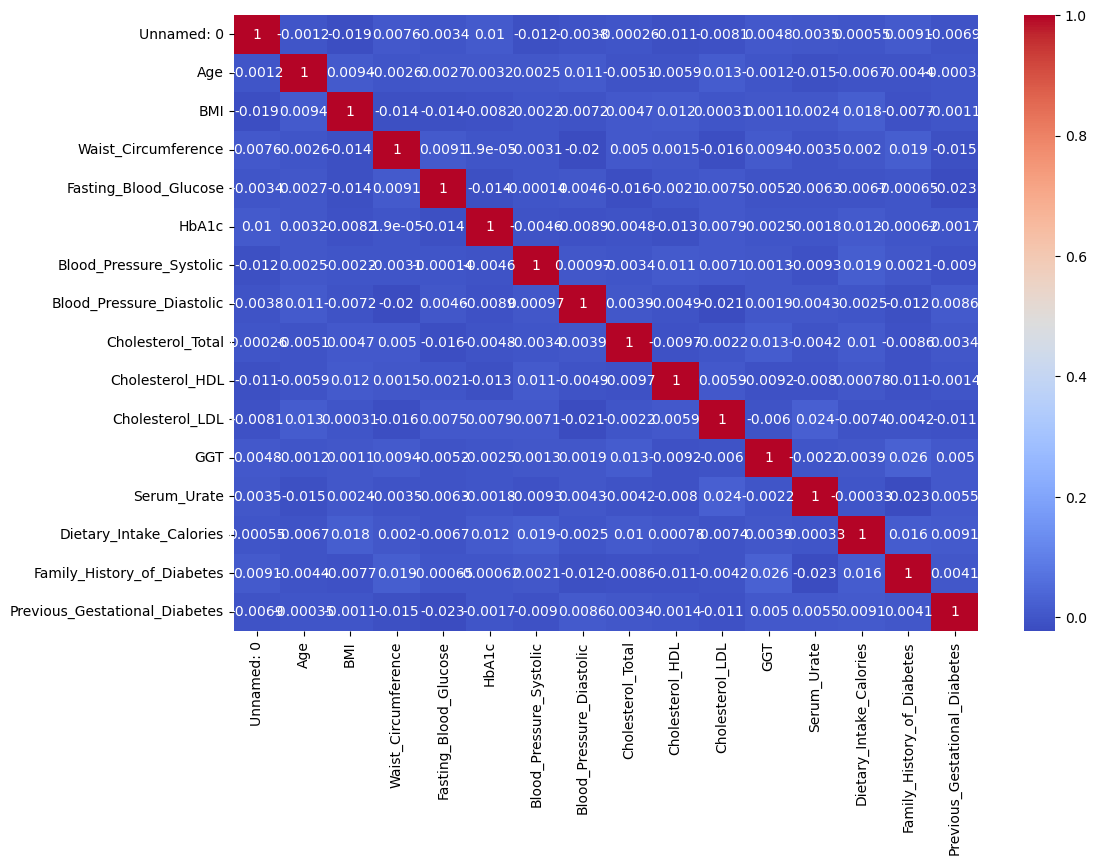

In [35]:
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [36]:
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [48]:
# check the males that have Previous_Gestational_Diabetes
Male_1 = df[(df['Sex'] == 'Male') & (df['Previous_Gestational_Diabetes'] == 1)]
print(f"Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is {Male_1.shape[0]} people or {(Male_1.shape[0]/len(df))*100} %.")

Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is 0 people or 0.0 %.


In [56]:
# Change those male with Previous_Gestational_Diabetes to having the value 0
df.loc[(df['Sex'] == 'Male') & (df['Previous_Gestational_Diabetes'] == 1), 'Previous_Gestational_Diabetes']=0

Target column Diabetes successfully created based on the threshold ≥126 mg/dL.


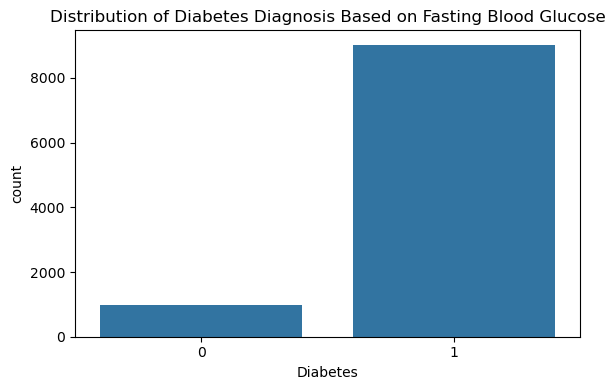

In [57]:
# Create target column Diabetes based on fasting blood glucose level
if 'Fasting_Blood_Glucose' in df.columns:
    # df['Diabetes'] = df['Fasting_Blood_Glucose'].apply(lambda x: 1 if x >= 126 else 0)
    df['Diabetes'] = np.where(
    (df['Fasting_Blood_Glucose'] >= 126) | (df['HbA1c'] > 6.5),
    1,  # Value if condition is True
    0   # Value if condition is False
)
    print('Target column Diabetes successfully created based on the threshold ≥126 mg/dL.')
else:
    print('Fasting_Blood_Glucose column not found. Please check your dataset.')

# Display the target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Diagnosis Based on Fasting Blood Glucose')
plt.tight_layout()
plt.show()

In [59]:
target_variable = 'Diabetes'
feature_names = [col for col in df.columns if col != target_variable]


# --- Data Splitting by specifying the input and output---
X = df[feature_names].values
y = df[target_variable].values

In [60]:
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)

# --- Feature Scaling (Important for some methods) ---

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
result = model.score(X_test_scaled, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(np.mean(result))

Accuracy: 97.000%
0.97


In [61]:
X_train_scaled[:5]

array([[-1.16896696, -1.00375706,  1.35452835, -1.06935796,  0.67198836,
        -0.75147647,  0.56325045,  0.94489117, -0.67269384,  0.48933517,
        -0.79571099, -0.51563001, -1.72512201,  1.43848933,  0.00706057,
         1.03195475,  0.70062003, -1.22062109, -1.02173618, -1.040833  ],
       [-0.75169609,  0.996257  ,  0.45719258,  0.41483634, -0.40878672,
        -0.84192094, -1.13250671, -0.96066921,  0.89171044, -1.2094319 ,
        -0.27948763,  0.41969627, -1.65551134,  0.54425398,  0.00706057,
         0.10181199,  0.70062003,  1.22735302, -1.02173618, -1.040833  ],
       [ 0.77829711, -1.00375706, -0.4401432 , -0.18206789, -1.4757057 ,
         0.17424925,  0.21781844, -0.35088989,  0.02259695,  0.10845617,
        -0.75441312, -0.24037685,  1.02836661,  1.09455266, -1.22086543,
         0.82774296, -1.42730717, -1.22062109, -1.02173618,  0.96076892],
       [ 1.33465827, -1.00375706,  0.45719258,  0.43096889, -0.92146207,
         1.39258941, -1.32092417, -1.15122525, -

In [62]:
from sklearn.pipeline import Pipeline

ScaledLR: 0.967000 (0.006230)
LDA: 0.956750 (0.006205)
KNN: 0.914875 (0.010284)
CART: 1.000000 (0.000000)
NB: 0.985375 (0.005675)
SVM: 0.964375 (0.007337)


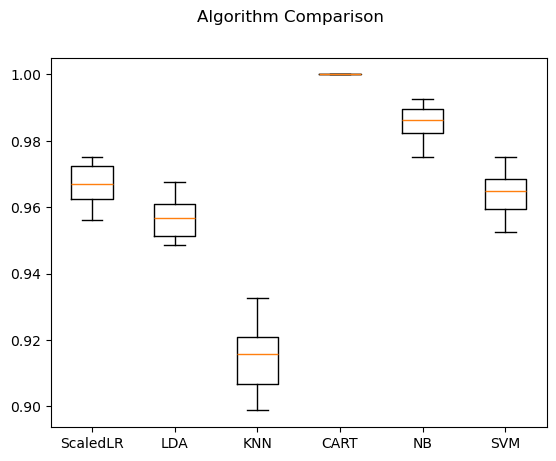

In [63]:
# prepare models
models = []
models.append(('ScaledLR', Pipeline([('Scaler', LogisticRegression())]))) # this is the only model with the scaler object while the rest of the model did not perform the data standardization
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ScaledLR: 0.967000 (0.006230)
ScaledLDA: 0.956750 (0.006205)
ScaledKNN: 0.914875 (0.010284)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 0.985375 (0.005675)
ScaledSVM: 0.964375 (0.007337)


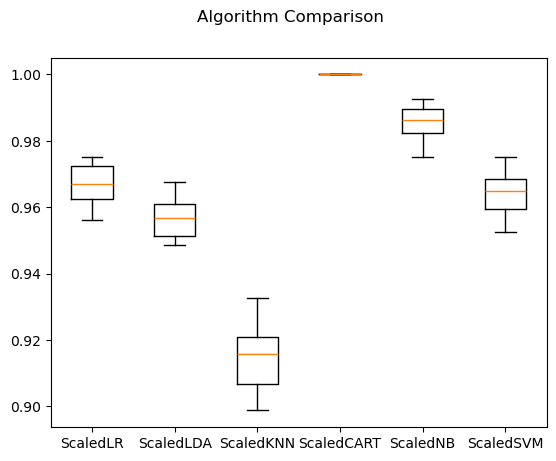

In [64]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', SVC())])))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [65]:
# Scaling the data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Define the hyperparameter grid for Logistic Regression
param_grid = [
    {'penalty': ['l1'], 'C': np.logspace(-3, 3, 7), 'solver': ['liblinear'], 'class_weight': [None, 'balanced']},
    {'penalty': ['l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': [None, 'balanced']},
    {'penalty': ['elasticnet'], 'C': np.logspace(-3, 3, 7), 'solver': ['saga'], 'l1_ratio': np.linspace(0, 1, 5), 'class_weight': [None, 'balanced']},
    {'penalty': [None], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': [None, 'balanced']}
]

# Define the cross-validation strategy
num_folds = 5  # You can adjust this
seed = 7      # You can adjust this
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=seed)

# Initialize GridSearchCV
scoring = 'accuracy'  # Define your scoring metric
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

# Fit the GridSearchCV object
grid_result = grid.fit(rescaledX, Y_train)

# Print the results
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.967250 using {'C': 0.1, 'class_weight': None, 'l1_ratio': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'}


In [67]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostClassifier(algorithm='SAMME'))])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
     kfold = KFold(n_splits=num_folds, random_state=seed, shuffle =True)
     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

ScaledAB: 0.999875 (0.000250)
ScaledGBM: 1.000000 (0.000000)
ScaledRF: 1.000000 (0.000000)
ScaledET: 0.962000 (0.008047)


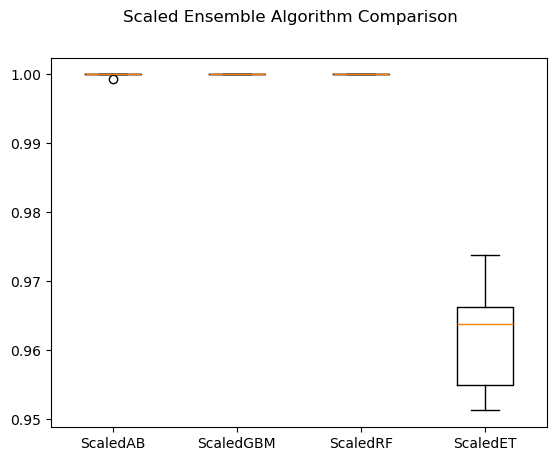

In [68]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [69]:
# Define the parameter grid
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],  # Example weak learners
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME'],  # Important: explicitly set to 'SAMME'
    'random_state': [42]
}

# Create AdaBoostClassifier
model = AdaBoostClassifier()

# Create KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)

# Fit GridSearchCV
grid_result = grid_search.fit(rescaledX, Y_train)

# Print results
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}
Best Accuracy: 1.0
Test Accuracy: 0.999


In [70]:
# Create AdaBoostClassifier
model = AdaBoostClassifier(algorithm = 'SAMME', estimator = DecisionTreeClassifier(max_depth=1), learning_rate = 0.01, n_estimators = 50, random_state = 42)
model.fit(rescaledX, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, random_state=42)

In [73]:
from imblearn.over_sampling import SMOTE
X = df[feature_names].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

cart = DecisionTreeClassifier()
cart.fit(X_train_resampled, y_train_resampled)
y_pred = cart.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00      1809

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[ 191    0]
 [   0 1809]]


<Axes: >

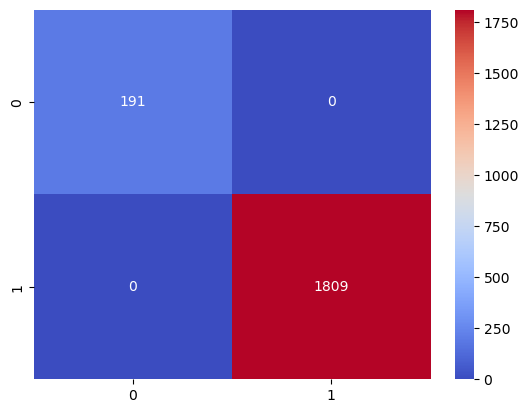

In [74]:
sns.heatmap(data = confusion_matrix(y_test, y_pred), annot = True, fmt= 'd', cmap = 'coolwarm')